## DESARROLLO DE UNA RED CNN

Para el desarrollo de esta red se compararán disntintos sets de datos provenientes del conjunto de datos  EMNIST.

Primeramente, se importan las liberías necesarias

In [1]:
import tensorflow
import emnist
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

import PIL
from keract import get_activations
from keract import display_activations
%matplotlib inline  

import glob
import matplotlib
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Se crea una función que obtendrá una serie de datos aletarios para hacer el enetrenamiento y las pruebas. La función sirve para ambos casos: de entrada recibe las imágenes y las etiquetas de los datos de entramiento o los datos de pruebas y una variable n que define cuántos datos serán seleccionados para ser utilizados en la red neuronal convolucional.

In [89]:
def selec_random(images, labels, n,p):
    X = np.array([])
    y = np.array([])
    letter = np.array([])
    total_index = np.array([])
    index = 0
    for i in range(p):  
        letter = np.array([])
        index = 0
        for k in labels:
            if i+1 == k:
                letter = np.append(letter,index)
            index = index + 1
        index2 = np.random.choice(letter, n, replace=False)
        index2 = index2.astype(int)
        total_index = np.append(total_index,index2)
    total_index = total_index.astype(int)
    total_index = np.sort(total_index)
    X = images[total_index[0]]
    y = labels[total_index[0]]
    total_index = np.delete(total_index, 0)
    X = X[np.newaxis, ...]
    for j in total_index:
        X = np.concatenate([X, images[j][None,...]], axis=0)
        y = np.append(y,labels[j])
    return X,y     # Los arrays X, y retornan con menos datos.

Se obtienen los tipos de datos que el conjunto de datos EMNIST ofrece. De esta forma se reconce que el abecedario escrito a mano será en el dataset llamado 'letters'.

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

Se obtienen los datos de entrenamiento dados por el conjunto de datos EMNIST y a su vez, por medio de la función selec_random se separan 100 de esos datos para utilizar en la red neuronal.

In [4]:
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
X_train, y_train = selec_random(images_train, labels_train, 100,26)     # Se obtienen 100 datos al azar
print("Dimensiones del array de entrada de entrenamiento:",X_train.shape)
print("Dimensiones del array de entrada de entrenamiento:",y_train.shape)

Dimensiones del array de entrada de entrenamiento: (2600, 28, 28)
Dimensiones del array de entrada de entrenamiento: (2600,)


De la misma forma se seleccionan 60 datos para las pruebas.

In [5]:
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')
X_test, y_test = selec_random(images_test, labels_test, 60,26)     # Se obtienen 60 datos al azar
print("Dimensiones del array de entrada de pruebas:",X_test.shape)
print("Dimensiones del array de salida de pruebas:",y_test.shape)

Dimensiones del array de entrada de pruebas: (1560, 28, 28)
Dimensiones del array de salida de pruebas: (1560,)


Seguidamente se redimencionan las entradas, tanto las imágenes de entrenamiento como las de prueba. Esto es con el fin de que Keras pueda ser capaz de entrenar la red, pues esperan valores de píxeles con las dimensiones [píxeles] [ancho] [alto] [canales].

In [6]:
# redimensión de los arrays
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [7]:
X_train.shape

(2600, 28, 28, 1)

Se redimensionan las variables en entradas de 0 a 1 y a las salidas se les utiliza la función One Hot Encode para obtener una columna por cada salida.

In [7]:
# normalizando los datos de 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode
y_train2 = y_train
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Se define la función modelo de la red neuronal convolucional, donde k es un parámetro de entrada que recibirá la cantidad de núcleos de convolución. Además, se recibe un booleano llamado graf, si este es verdadero se mostrará el mapa de activación de una letra 

In [8]:
# defnición del modelo de la red convucional
def baseline_model(k,pixel,pool):
    # create model
    model = Sequential()
    model.add(Conv2D(k, (pixel, pixel), input_shape=(28, 28, 1), activation='relu'))   # número de núcleos, pixeles...
    model.add(MaxPooling2D(pool_size=(pool, pool)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Se crea y entrena el modelo de la red CNN.

In [77]:
# construcción del modelo
model = baseline_model(8,5,1)
# Fit
model.fit(X_train, y_train, epochs=10, verbose=2)
# Evaluación final del modelo
loss_var, accuracy_var = model.evaluate(X_test, y_test)

Epoch 1/10
82/82 - 1s - loss: 1.9629 - accuracy: 0.4469
Epoch 2/10
82/82 - 1s - loss: 1.0789 - accuracy: 0.6738
Epoch 3/10
82/82 - 1s - loss: 0.8054 - accuracy: 0.7492
Epoch 4/10
82/82 - 1s - loss: 0.5841 - accuracy: 0.8181
Epoch 5/10
82/82 - 1s - loss: 0.4418 - accuracy: 0.8623
Epoch 6/10
82/82 - 1s - loss: 0.3187 - accuracy: 0.9050
Epoch 7/10
82/82 - 1s - loss: 0.2441 - accuracy: 0.9254
Epoch 8/10
82/82 - 1s - loss: 0.1809 - accuracy: 0.9504
Epoch 9/10
82/82 - 1s - loss: 0.1263 - accuracy: 0.9662
Epoch 10/10
82/82 - 1s - loss: 0.1132 - accuracy: 0.9685
49/49 [==============================] - 0s 3ms/step - loss: 1.0240 - accuracy: 0.7494


Se hace el entreamiento de la red de perceptrón multicapa, se repiten los pasos para obtener los datos y el set a utilizar, a su vez se redimensionan los datos para luego generar el entrenamiento.

In [65]:
from emnist import extract_training_samples
from emnist import extract_test_samples

# Datos de entrenamiento y obtención de 100 datos random de los mismos.
images_train1, labels_train1 = extract_training_samples('letters')
X_train1 = images_train1
y_train1 = labels_train1
X_train1, y_train1 = selec_random(images_train1, labels_train1, 100)

# Datos de pruebas y obtención de 60 datos random de los mismos.
images_test1, labels_test1 = extract_test_samples('letters')
X_test1 = images_test1
y_test1 = labels_test1
X_test1, y_test1 = selec_random(images_test1, labels_test1, 60)

# Redimensionamiento
num_pixels1 = X_train1.shape[1] * X_train1.shape[2]
X_train1 = X_train1.reshape((X_train1.shape[0], num_pixels1)).astype('float32')
X_test1 = X_test1.reshape((X_test.shape[0], num_pixels1)).astype('float32')
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255
y_train1 = np_utils.to_categorical(y_train1)
y_test1 = np_utils.to_categorical(y_test1)
num_classes1 = y_test1.shape[1]

# Definición del Modelo
def baseline_model1():
    # create model
    model1 = Sequential()
    model1.add(Dense(num_pixels1, input_dim=num_pixels1, kernel_initializer='normal', activation='tanh'))
    model1.add(Dense(num_classes1, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

# Construcción del modelo
model1 = baseline_model1()
# Fit
model1.fit(X_train1, y_train1, epochs=10, verbose=2)
# Evaluación final del modelo
loss_var1, accuracy_var1 = model1.evaluate(X_test1, y_test1)

Epoch 1/10
82/82 - 0s - loss: 1.8301 - accuracy: 0.4804
Epoch 2/10
82/82 - 0s - loss: 1.1300 - accuracy: 0.6588
Epoch 3/10
82/82 - 0s - loss: 0.9418 - accuracy: 0.7115
Epoch 4/10
82/82 - 0s - loss: 0.8162 - accuracy: 0.7515
Epoch 5/10
82/82 - 0s - loss: 0.6996 - accuracy: 0.7904
Epoch 6/10
82/82 - 0s - loss: 0.6273 - accuracy: 0.8058
Epoch 7/10
82/82 - 0s - loss: 0.5363 - accuracy: 0.8319
Epoch 8/10
82/82 - 0s - loss: 0.4501 - accuracy: 0.8669
Epoch 9/10
82/82 - 0s - loss: 0.3841 - accuracy: 0.8892
Epoch 10/10
82/82 - 0s - loss: 0.3215 - accuracy: 0.9104
49/49 [==============================] - 0s 2ms/step - loss: 1.2565 - accuracy: 0.6551


Para obtener como se comportan los set de datos ante los nucleos convolucionales. Se utilizó el modelo de 8 kernels. Además, como solo hay una capa oculta con la convolución bastaba con obtener los datos en la primer capa neuronal del modelo.

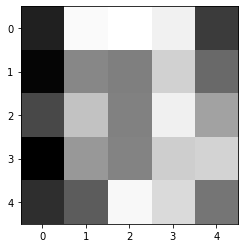

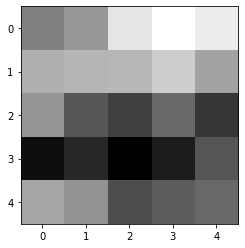

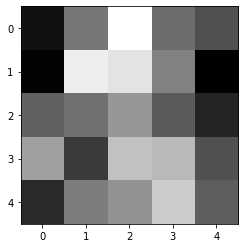

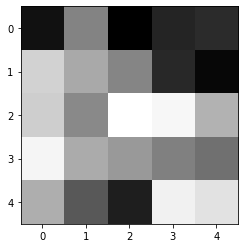

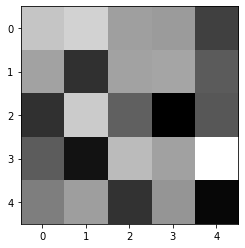

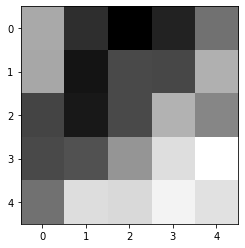

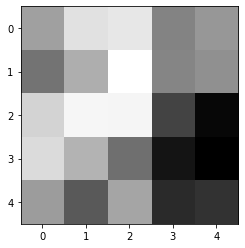

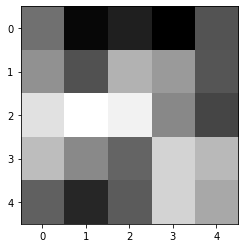

In [33]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Seleccionando el filtro de 8 núcleos
n_filters, ix = 8, 1 ###############
for i in range(n_filters):
    # obteniendo el valor
    f = filters[:, :, :, i]
    # escala de grises
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.show()
    ix += 1

Se crea un array_i, que posee los índices de las letras en orden alfábetico. Por lo que el primer elemento del array corresponde a la primer letra 'a' que tiene los datos de entradas de entrenamiento y el último elemento posee la primer letra 'z' que aparece en los mismos datos. La creación de este array será útil para poder enseñar el mapa de activación. Así, por medio de cada índice del array_i se permite mostrar la imagen de cada letra.

In [50]:
model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)   # Capa de convolución
array_i = np.array([])
X_array = np.array([])
for i in range(26):
    index_i =  np.where(y_train2 == i+1)
    array_i = np.append(array_i,index_i[0][0])
array_i = array_i.astype(int)
X_array = X_train[array_i[0]]
array_i = np.delete(array_i, 0)
X_array = X_array[np.newaxis, ...]
for i in array_i:
    X_array = np.concatenate([X_array , X_train[i][None,...]], axis=0)    # Array de letras seleccionadas
X_array.shape

(26, 28, 28, 1)

Se obtienen por cada letra del alfabeto, las imágenes 8 distintos filtros dados por la red convolutiva.

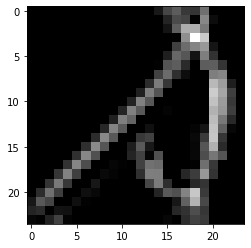

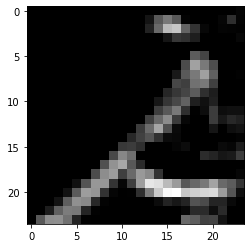

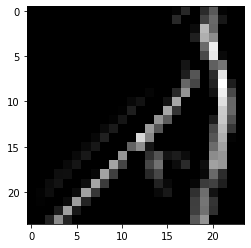

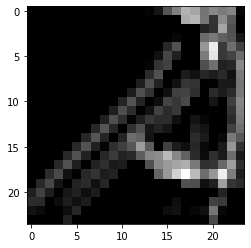

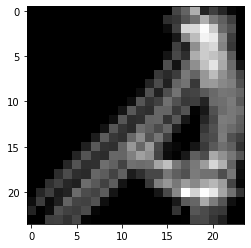

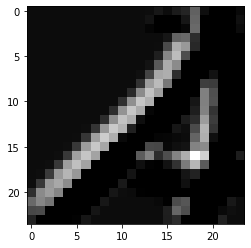

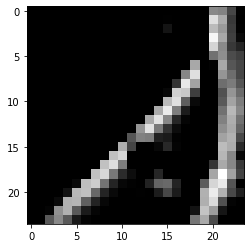

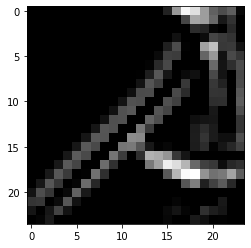

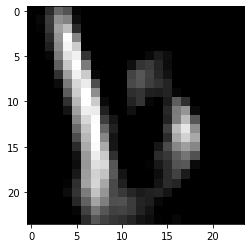

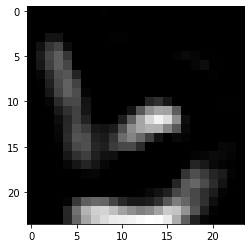

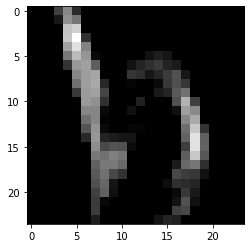

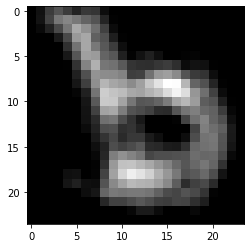

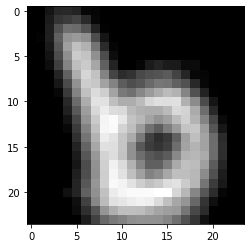

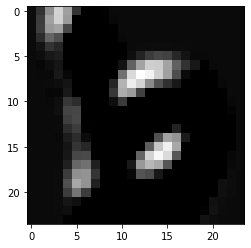

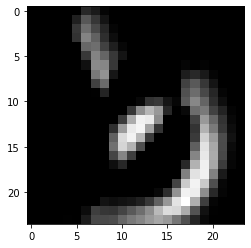

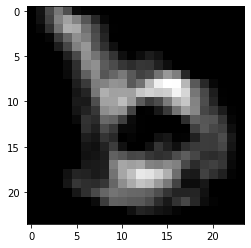

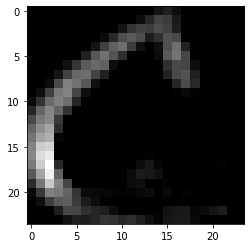

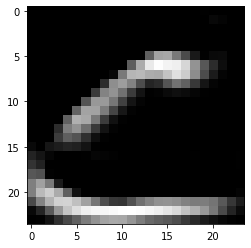

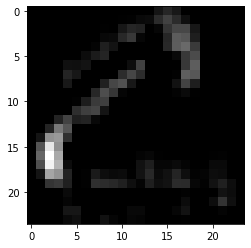

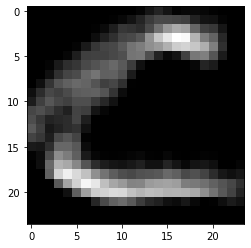

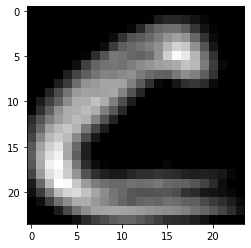

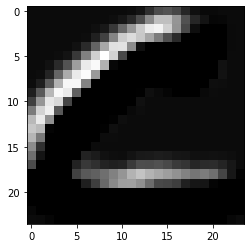

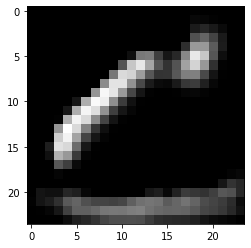

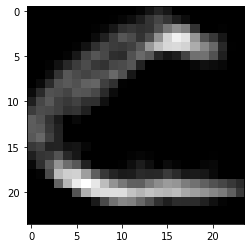

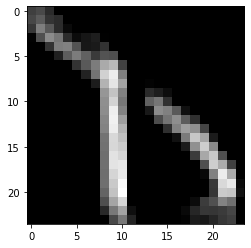

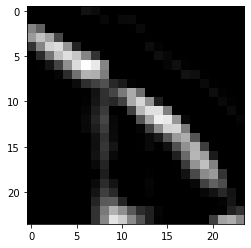

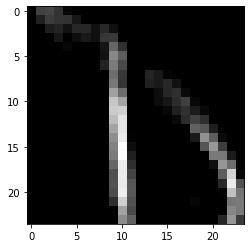

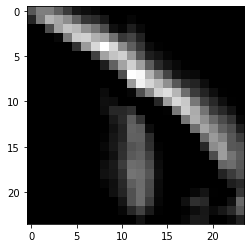

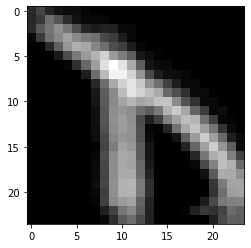

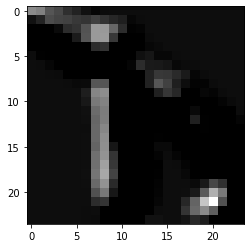

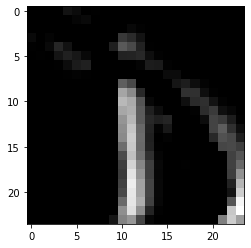

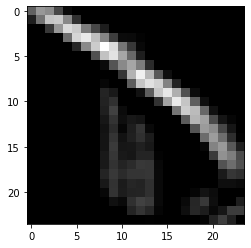

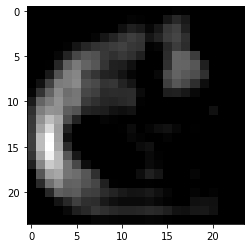

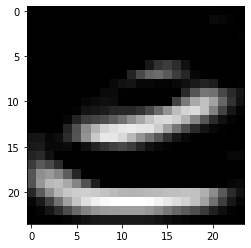

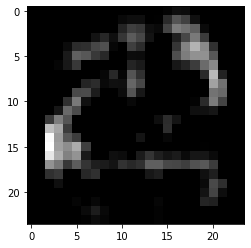

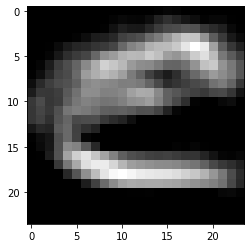

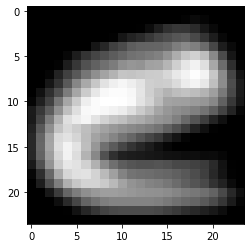

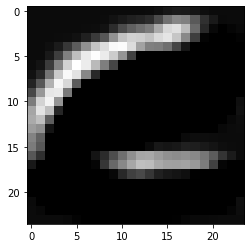

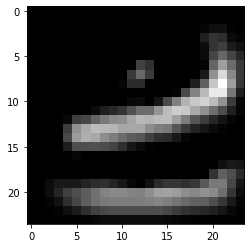

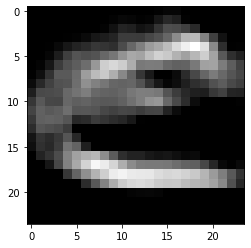

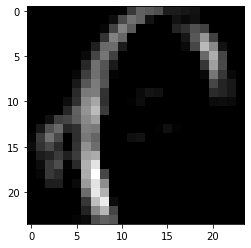

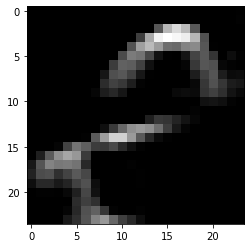

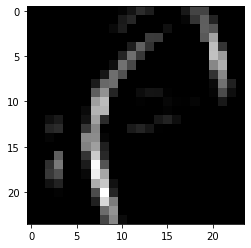

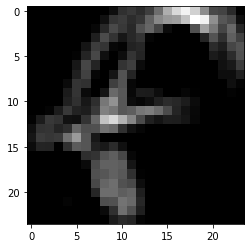

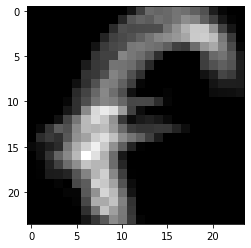

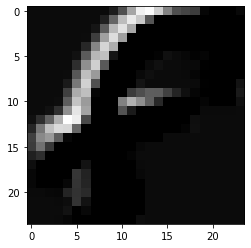

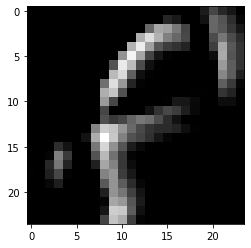

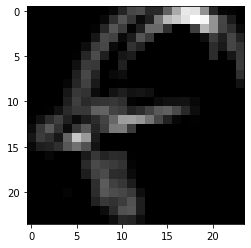

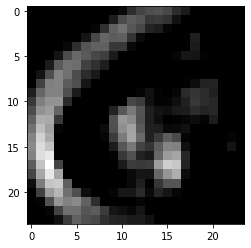

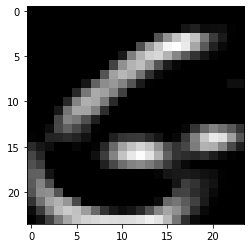

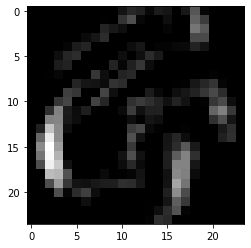

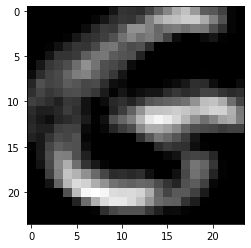

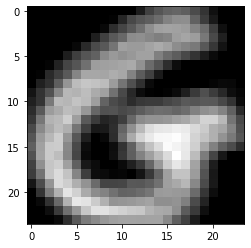

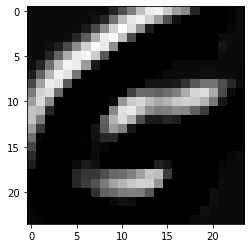

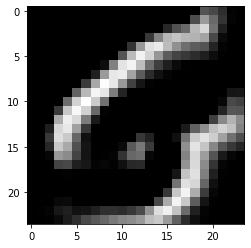

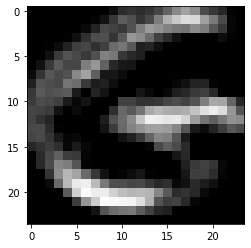

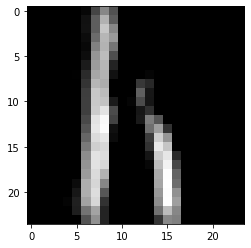

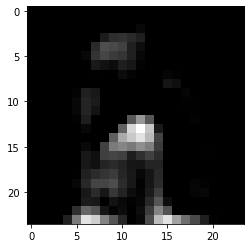

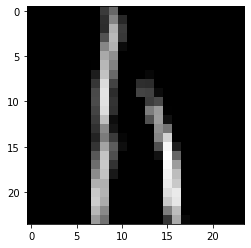

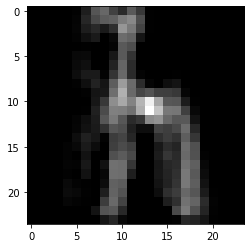

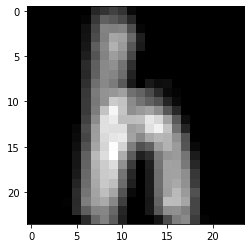

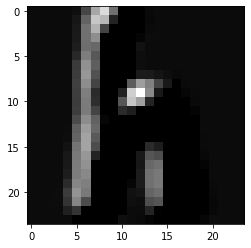

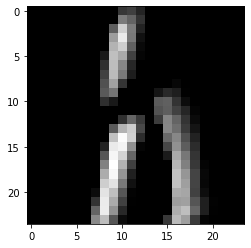

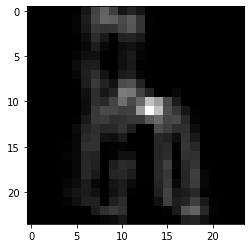

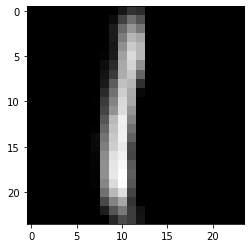

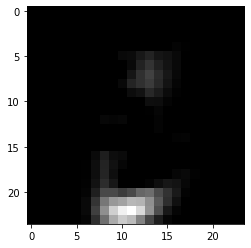

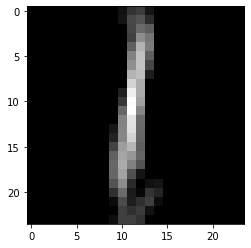

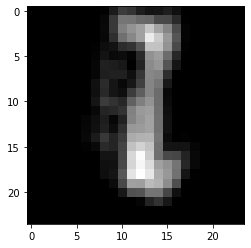

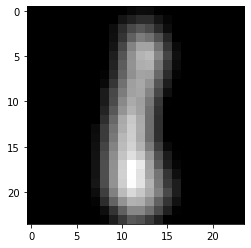

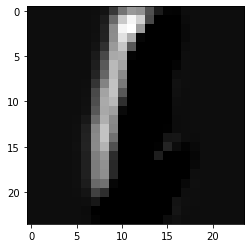

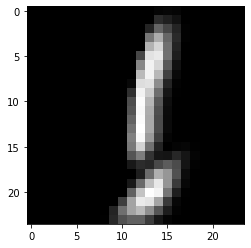

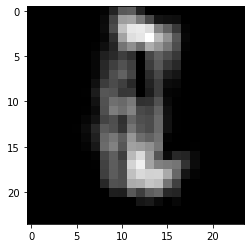

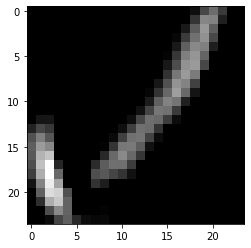

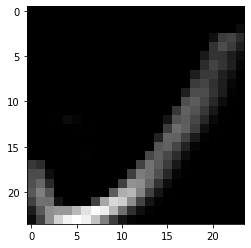

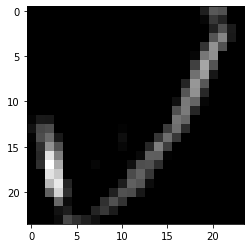

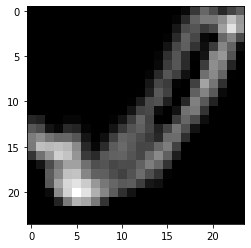

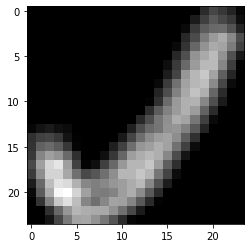

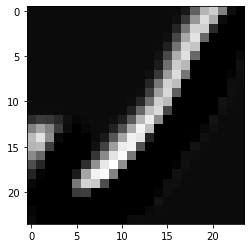

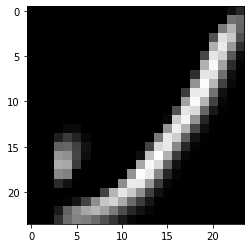

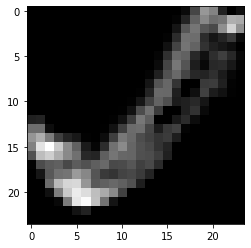

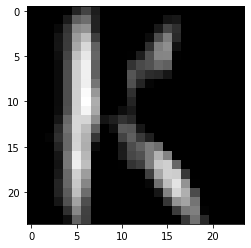

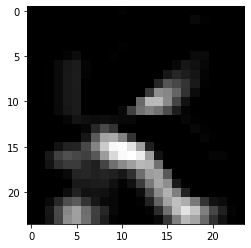

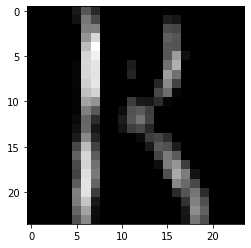

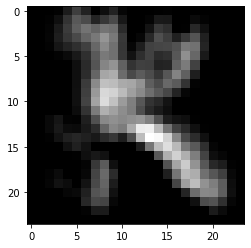

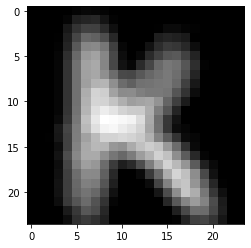

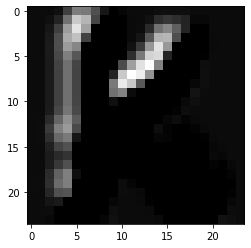

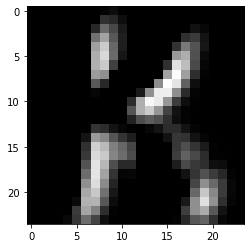

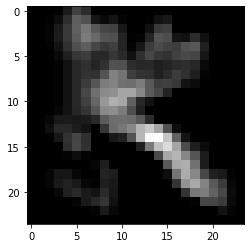

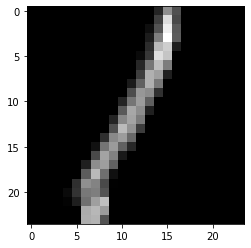

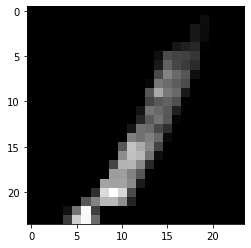

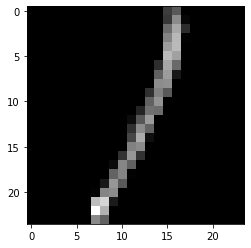

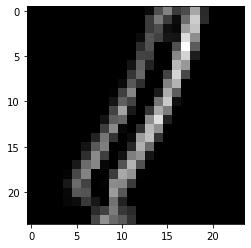

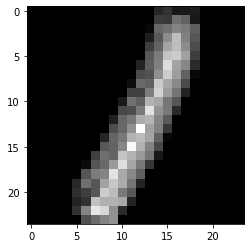

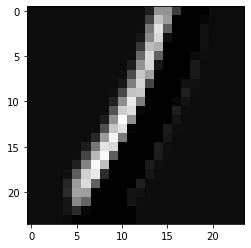

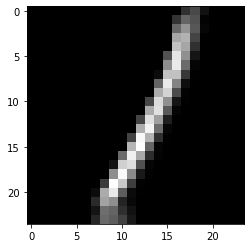

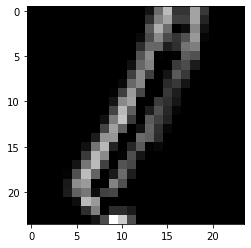

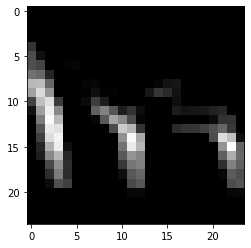

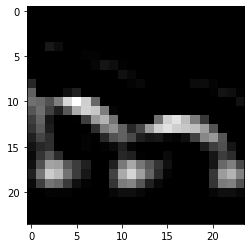

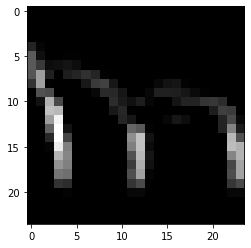

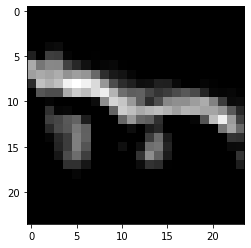

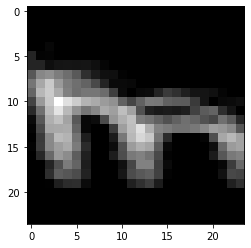

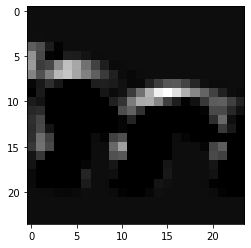

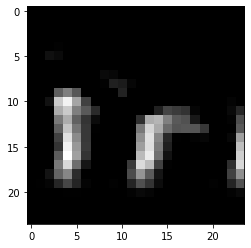

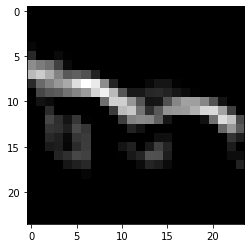

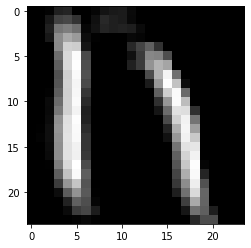

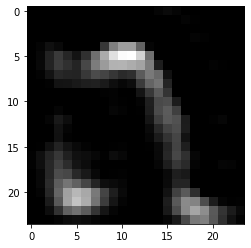

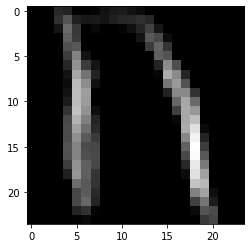

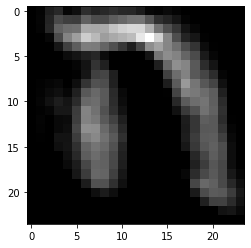

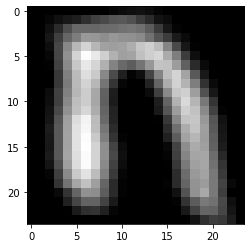

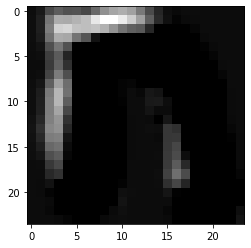

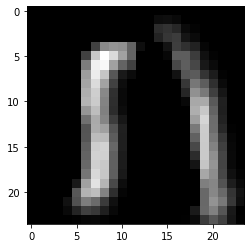

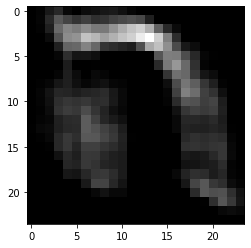

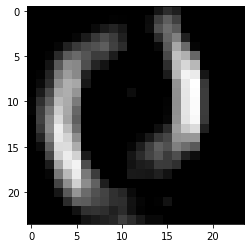

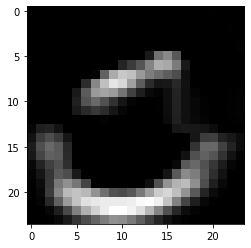

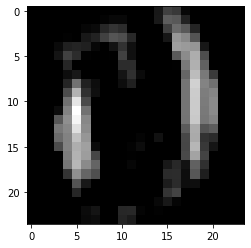

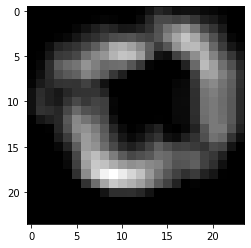

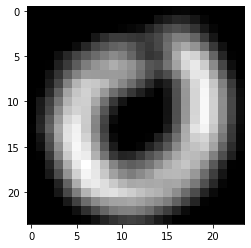

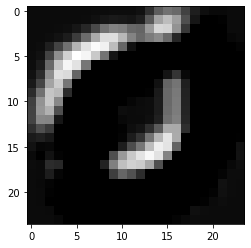

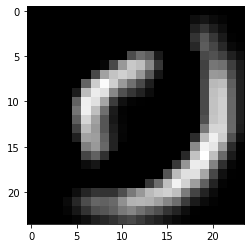

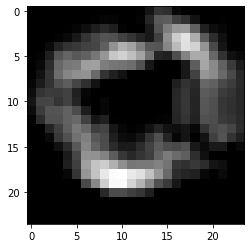

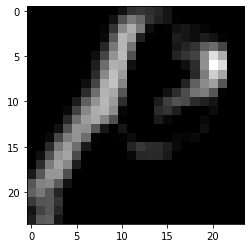

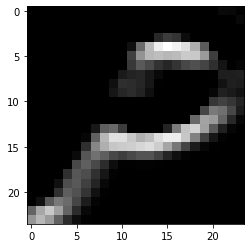

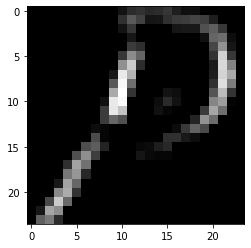

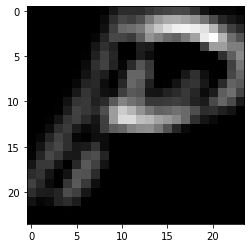

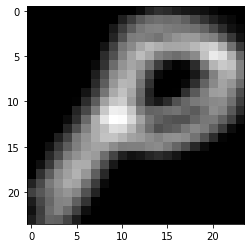

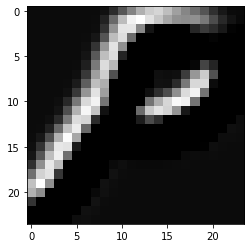

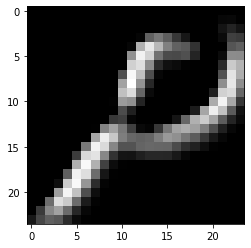

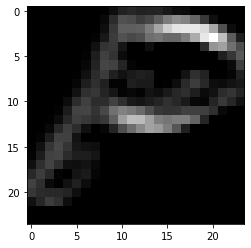

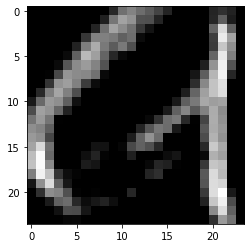

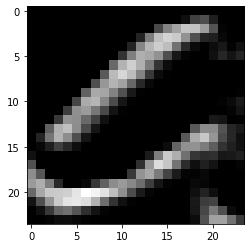

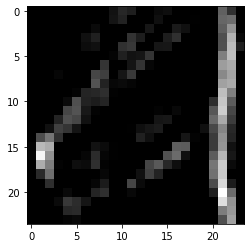

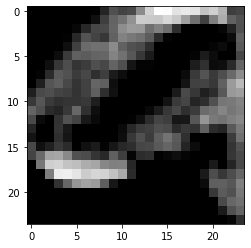

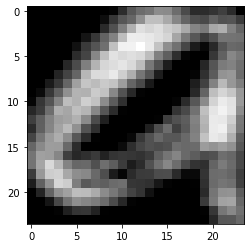

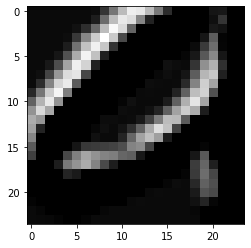

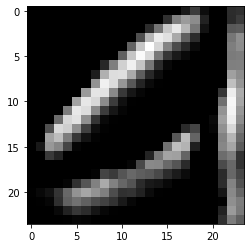

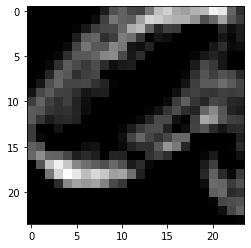

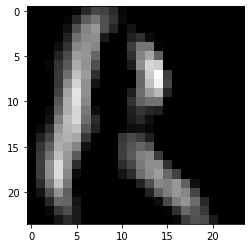

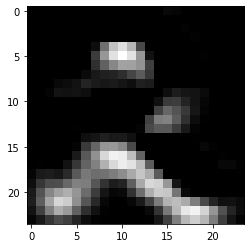

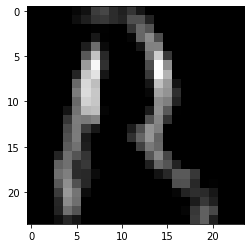

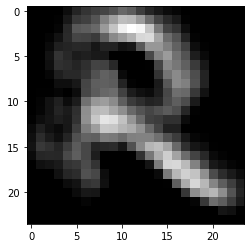

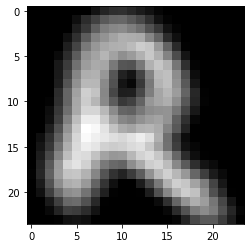

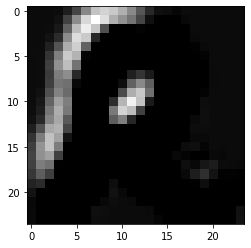

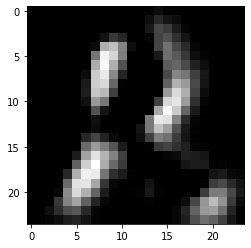

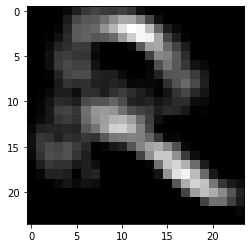

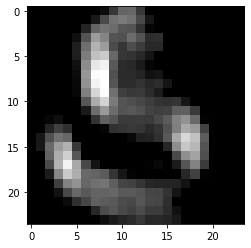

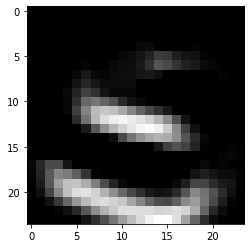

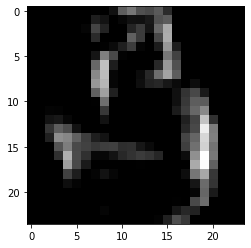

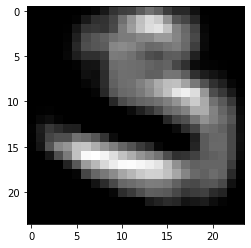

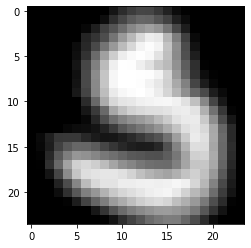

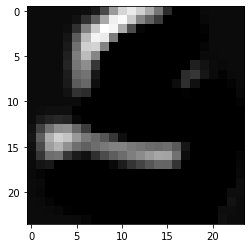

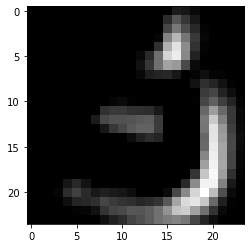

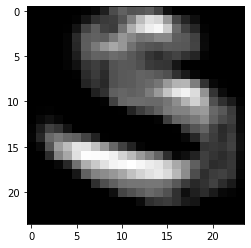

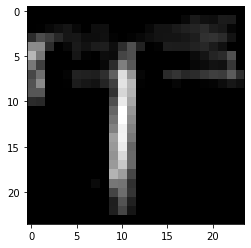

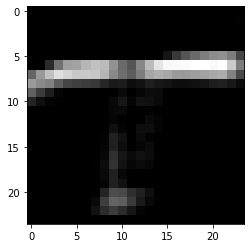

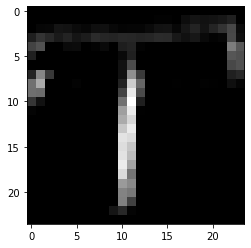

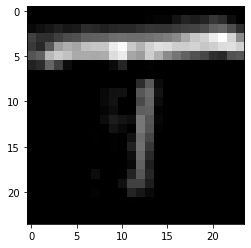

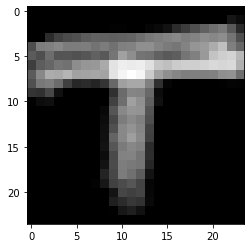

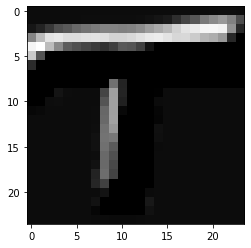

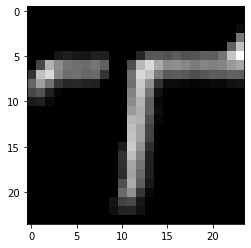

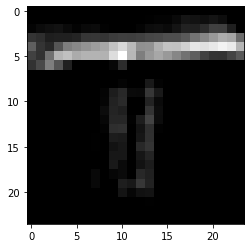

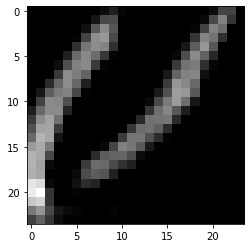

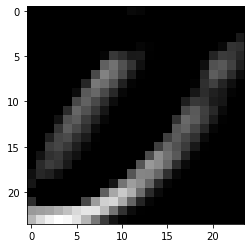

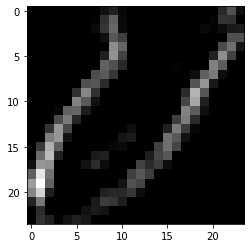

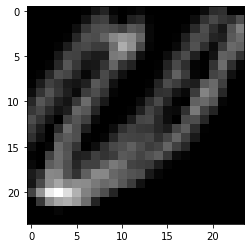

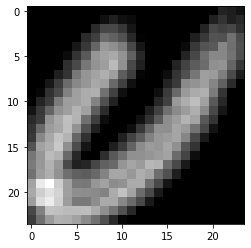

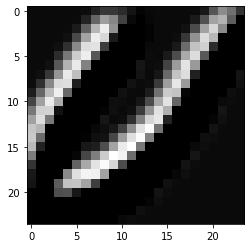

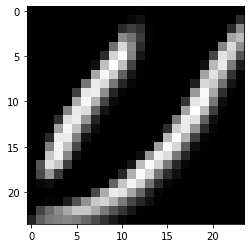

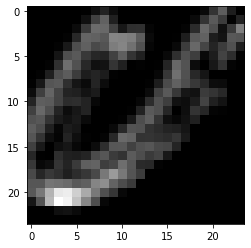

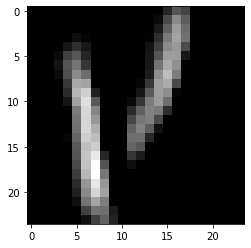

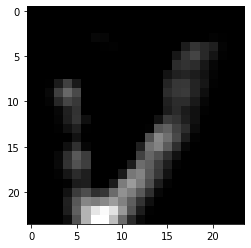

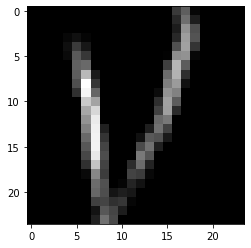

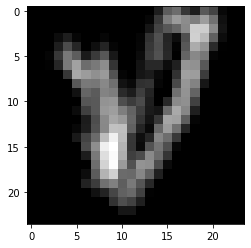

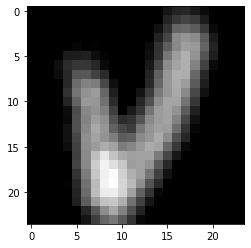

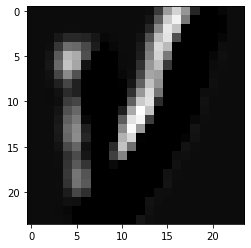

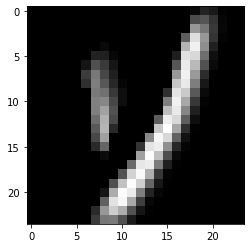

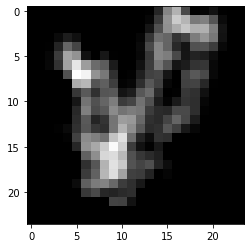

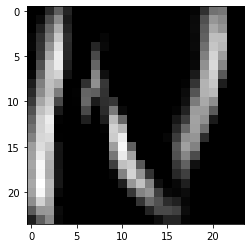

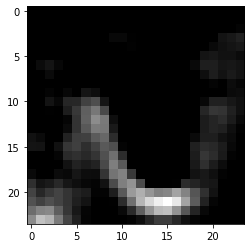

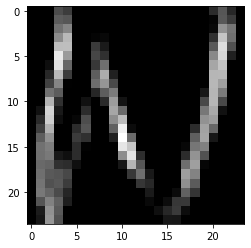

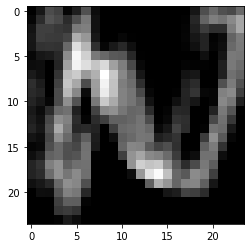

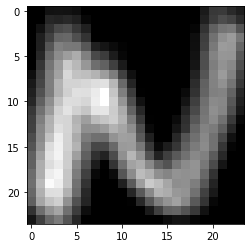

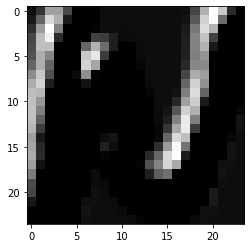

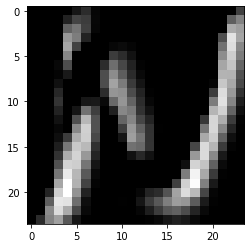

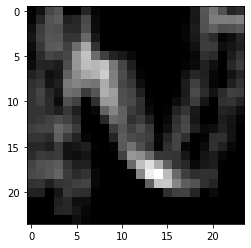

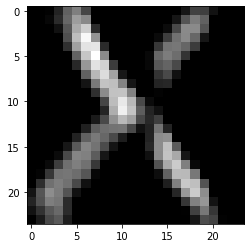

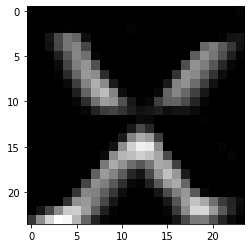

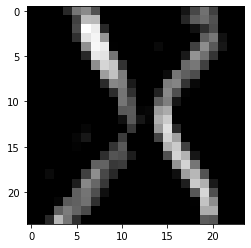

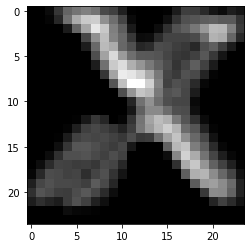

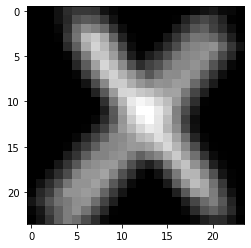

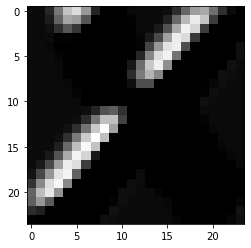

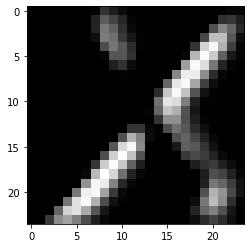

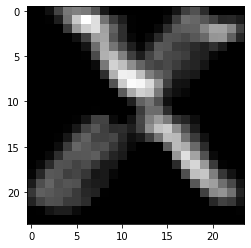

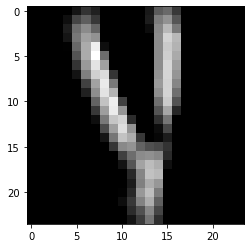

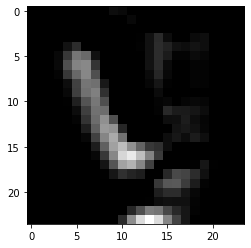

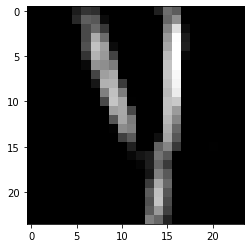

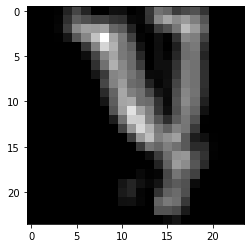

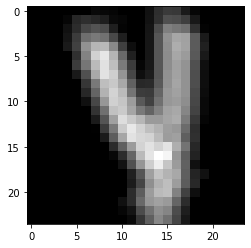

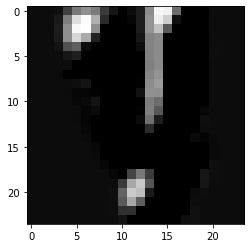

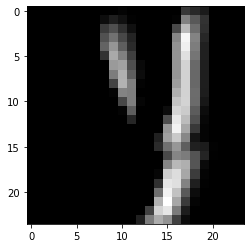

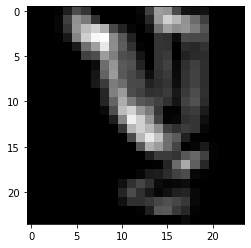

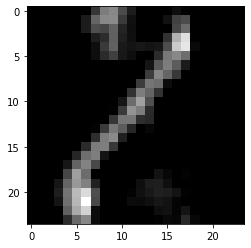

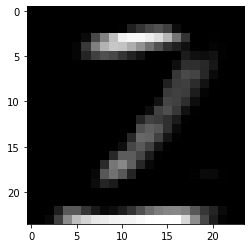

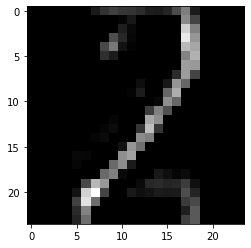

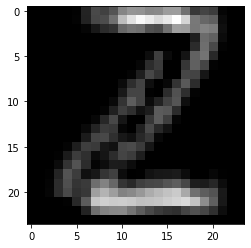

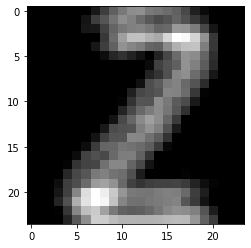

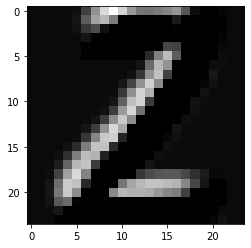

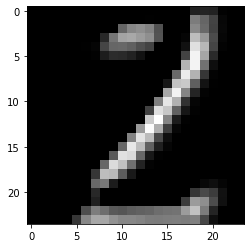

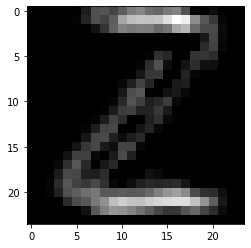

In [72]:
feature_maps = model2.predict(X_array)
for i in feature_maps:    
    for n in range(8):     # Muestra de los filtros por cada núcleo
        # escala de grises
        plt.imshow(i[:, :, n], cmap='gray')
        ix += 1
        plt.show()

Se repite el procedimiento de para obtener las imágenes de los filtros con otro set de datos, en este caso se utiliza el set de dígitos del bando de datos EMNSIT. Para ello, se empieza entrenando el modelo al igual que con las letras.

In [91]:
# Obtención de datos de los números
images_train, labels_train = extract_training_samples('digits')
images_test, labels_test = extract_test_samples('digits')
X_train, y_train = selec_random(images_train, labels_train, 100,9)
X_test, y_test = selec_random(images_test, labels_test, 60,9)

# Redimencionamiento
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalización de 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode
y_train2 = y_train
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Construcción del modelo
model = baseline_model(8,5,1)
# Fit
model.fit(X_train, y_train, epochs=10, verbose=2)
# Evaluación final del modelo
loss_var, accuracy_var = model.evaluate(X_test, y_test)

Epoch 1/10
29/29 - 0s - loss: 1.1226 - accuracy: 0.6700
Epoch 2/10
29/29 - 0s - loss: 0.3186 - accuracy: 0.8989
Epoch 3/10
29/29 - 0s - loss: 0.1902 - accuracy: 0.9411
Epoch 4/10
29/29 - 0s - loss: 0.1489 - accuracy: 0.9556
Epoch 5/10
29/29 - 0s - loss: 0.1135 - accuracy: 0.9589
Epoch 6/10
29/29 - 0s - loss: 0.0611 - accuracy: 0.9889
Epoch 7/10
29/29 - 0s - loss: 0.0331 - accuracy: 0.9978
Epoch 8/10
29/29 - 0s - loss: 0.0823 - accuracy: 0.9744
Epoch 9/10
29/29 - 0s - loss: 0.0345 - accuracy: 0.9933
Epoch 10/10
29/29 - 0s - loss: 0.0172 - accuracy: 0.9978
17/17 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.9204


Nuevamente se obtienen los datos a 5 pixeles datos por la primer capa neuronal convolucional.

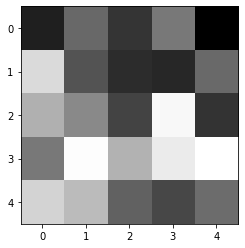

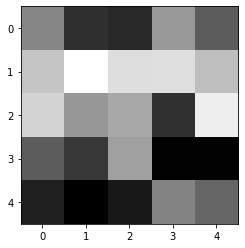

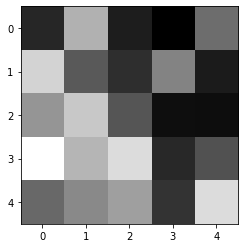

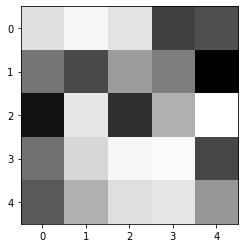

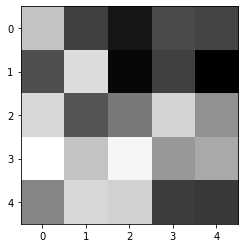

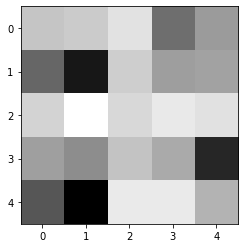

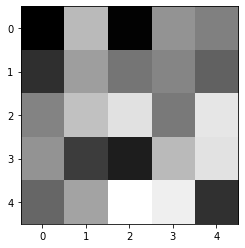

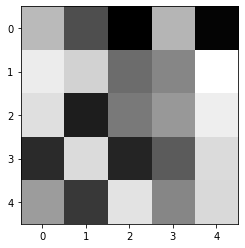

In [92]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters, ix = 8, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    # escala de grises
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.show()
    ix += 1

Y, por último se obtienen los 8 filtros para cada número. De igual manera, se selecionaron los primeros números que no se repitieran en el set de datos para mostrar el efecto de la capa convolucional.

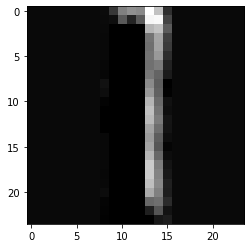

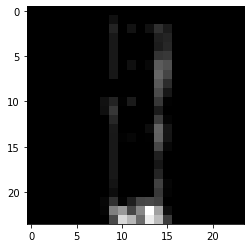

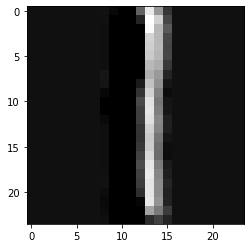

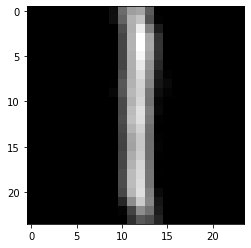

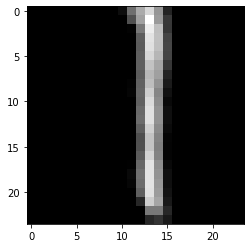

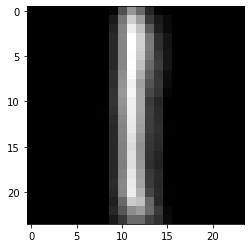

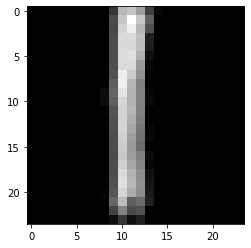

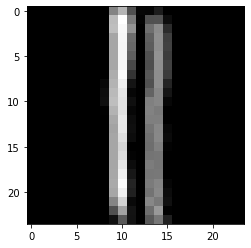

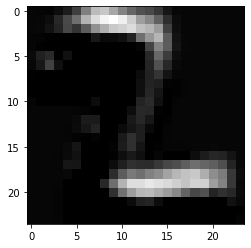

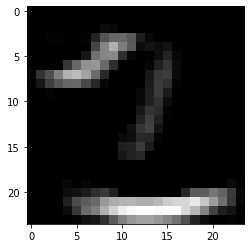

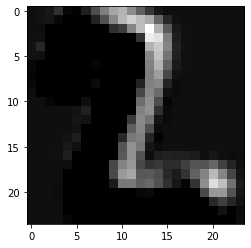

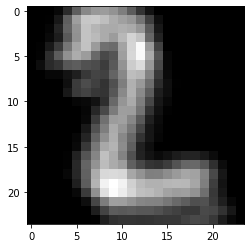

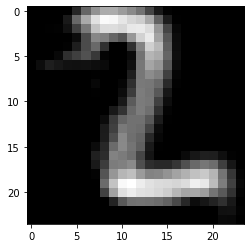

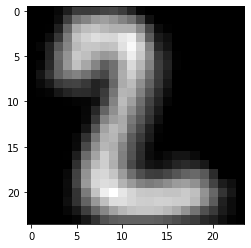

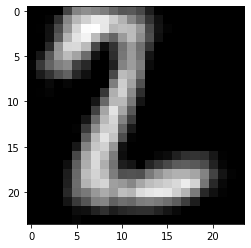

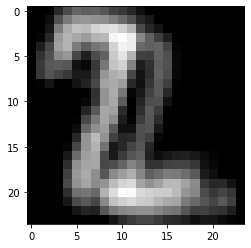

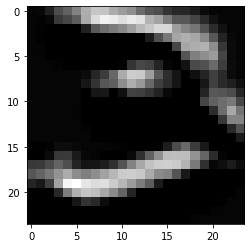

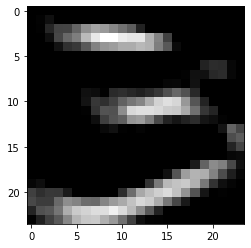

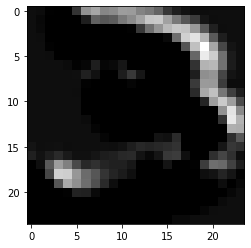

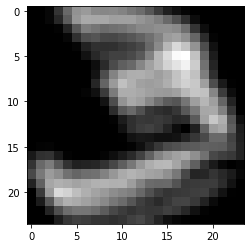

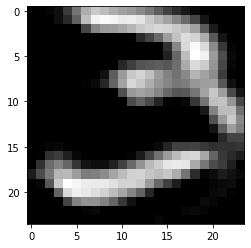

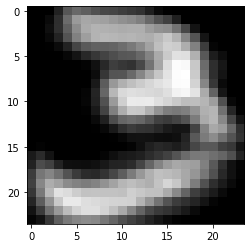

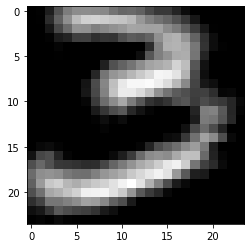

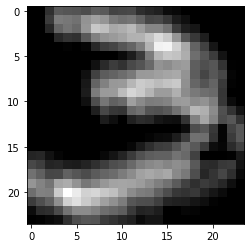

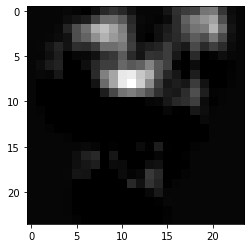

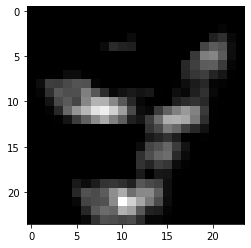

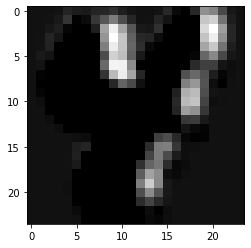

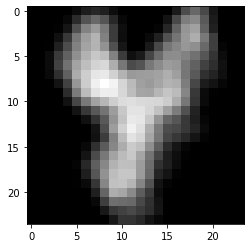

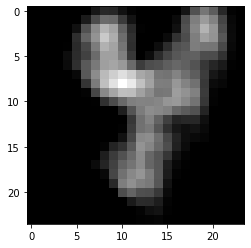

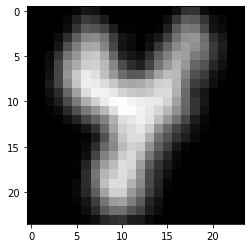

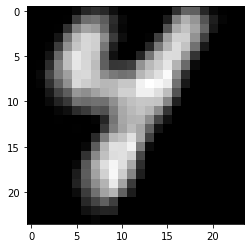

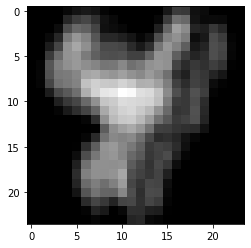

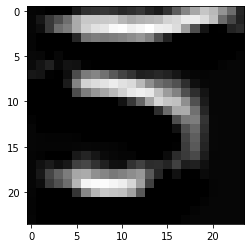

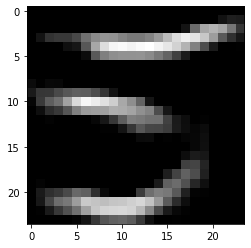

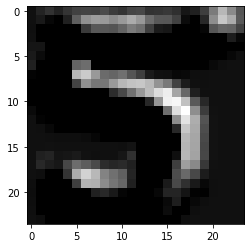

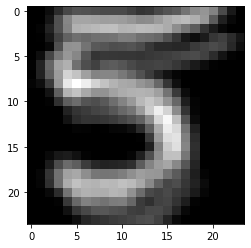

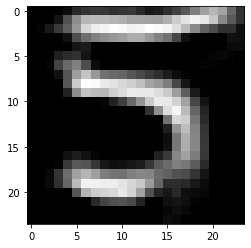

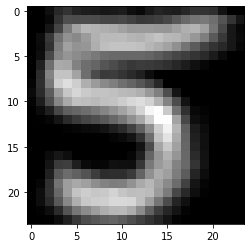

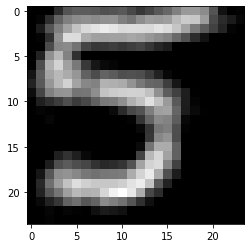

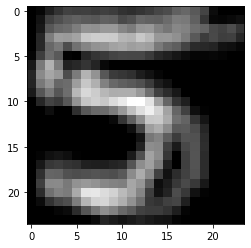

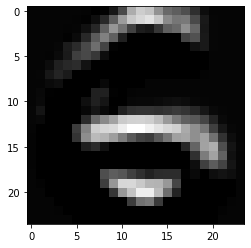

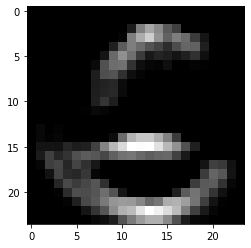

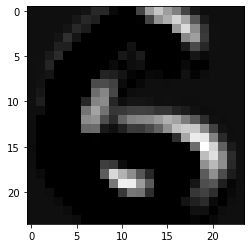

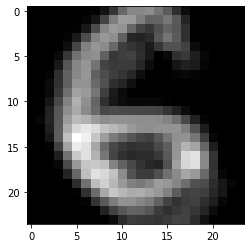

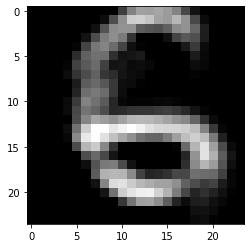

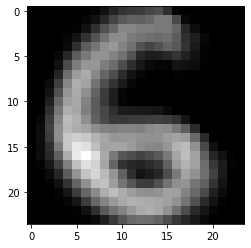

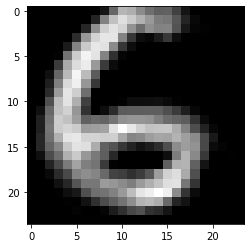

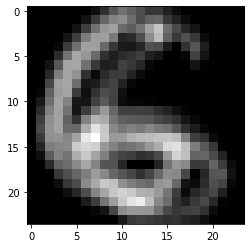

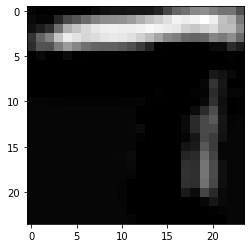

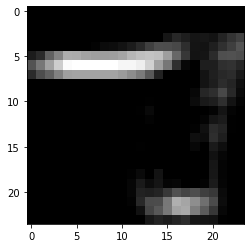

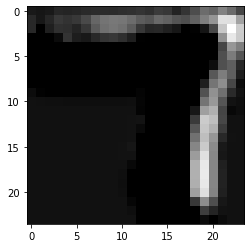

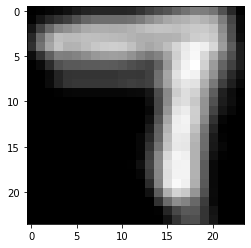

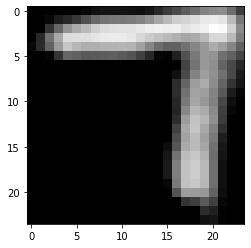

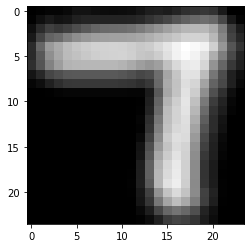

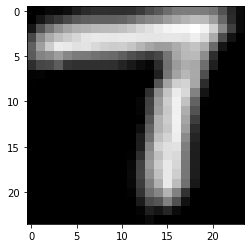

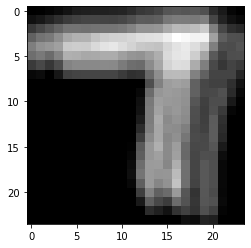

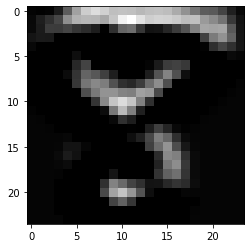

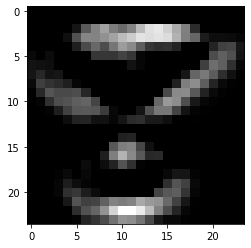

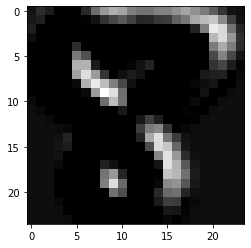

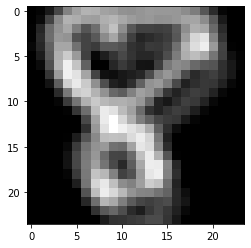

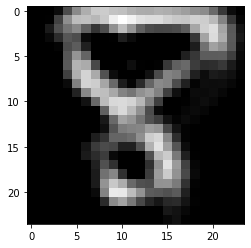

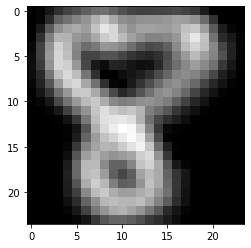

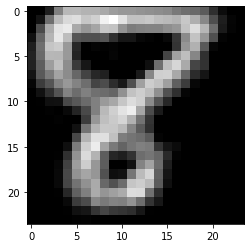

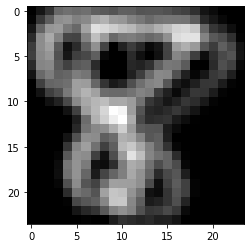

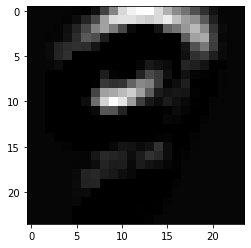

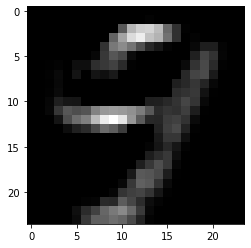

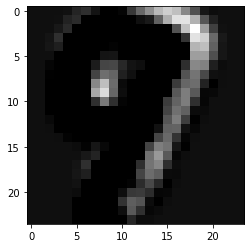

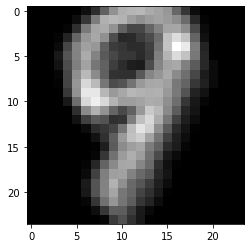

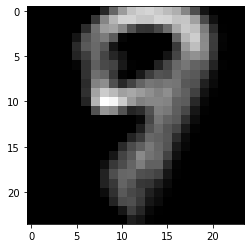

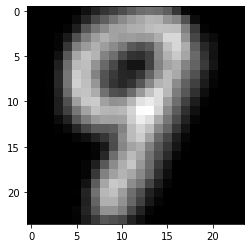

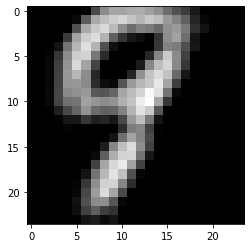

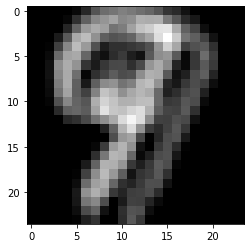

In [94]:
model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)  # Capa convolucional
X_t = X_train[0]

array_i = np.array([])
X_array = np.array([])
for i in range(9):
    index_i =  np.where(y_train2 == i+1)
    array_i = np.append(array_i,index_i[0][0])
array_i = array_i.astype(int)
X_array = X_train[array_i[0]]
array_i = np.delete(array_i, 0)
X_array = X_array[np.newaxis, ...]
for i in array_i:
    X_array = np.concatenate([X_array , X_train[i][None,...]], axis=0)   # Array de números
    
feature_maps = model2.predict(X_array)
for i in feature_maps: 
    for n in range(8):
        # grises
        plt.imshow(i[:, :, n], cmap='gray')
        ix += 1
        plt.show()

## Análisis

Es importante primero recalcar que todos los análisis con distintos kernels se realizaron con algunos valores que si se mantuvieron estándar, para hacer la comparación, los cuales son una cantidad de pixeles de 5, un pool de 2 y 15 epochs.


A-	Un CNN que utilice 8 núcleos de convolución (kernels)
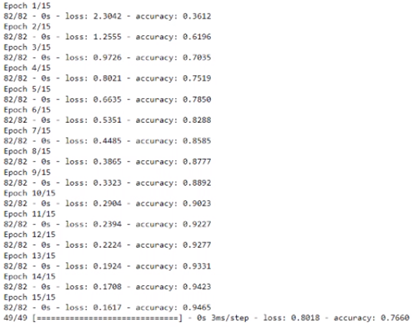

B-	Un CNN que utilice 16 núcleos de convolución (kernels)
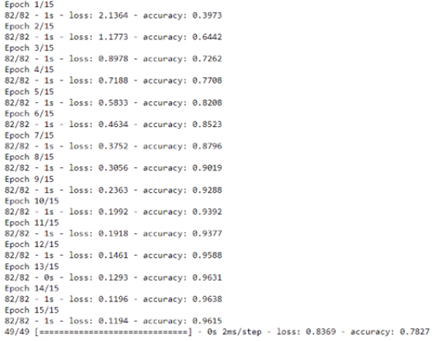

C-	Un CNN que utilice 24 nucleos de convolución (kernels)
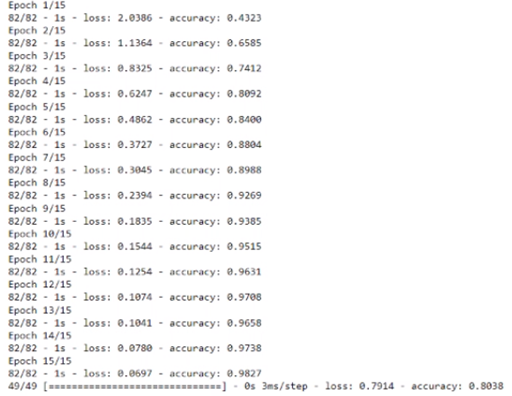

A primera vista lo que se observa es que por ahora presenta un mejor error y precisión la CNN de 24 núcleos, su error es de 6.9% y precisión de 98.27%, donde por otro lado la CNN de 16 nos aporta un error de 11.94% y una precisión de 96.15%, por último la CNN de 8 nos aporta un error de 16.17% y 94.65%, es por esto que entonces para el punto D, se toma como mejor CNN la de 24 núcleos, y en la que se van a modificar los otros valores que eran constantes para evaluar si mejora su rendimiento.

D-	Una red densa con las mejores características, no exhaustivo.

Para realizar una buena comparación con la CNN para esta MLP lo que se realizo fue dos pruebas utilizando la misma función de activación de capa oculta Tanh, función de activación softmax de capa de salida que había demostrado una mejor precisión en las taras programadas pasadas, lo que se varía en estos dos recorridas fue las iteraciones o epochs, manteniéndose en el rango de las CNN (entre 5 y 15) los ejemplos que se presentan son de 10 y 15.
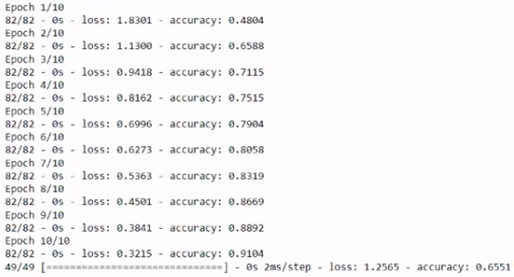


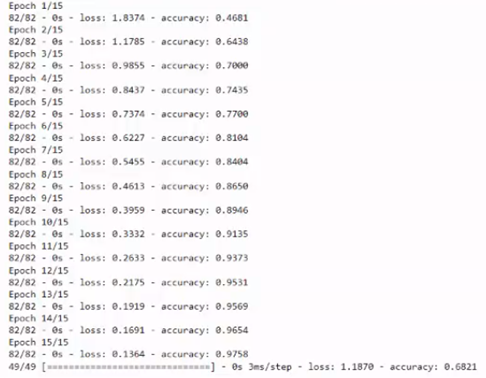

Nuevamente si observa con detenimiento, mientras más epochs, mejor es la precisión y el error mejora, sin embargo, en su mejor punto que es para 15 iteraciones con 13.64% de error y 97.58% de precisión no supera en ninguna ocasión a la CNN.

### 1 - ¿Cuál es la red que obtiene mejores resultados de clasificación? ¿Cómo se justifica dicho resultado en base a la teoría?

Lo primero que se debe tomar en cuenta es que los parámetros que afectan la eficiencia de la CNN serán Kernel (también llamado núcleo, se pueden relacionar a filtros en forma de matriz cuadrada, por los que la imagen tiene que pasar, a más kernels, puede mejorar el filtrado de la imagen, pero consume más recursos [1]), pooling (estos se presentan en layers o capas y permiten reducir la dimensionalidad de las entradas, con esto, se reduce la complejidad del modelo [1]), los pixeles (serían el tamaño del kernel, ejemplo, un pix 3, será una matriz 3x3 cada kernel) y los epochs, que son las iteraciones para entrenar el modelo.

Como se comenzó modificando Kernels anteriormente entre 8, 16 y 24 anteriormente, y se mantuvo constante el pooling layer en 2, 5 pixeles, 15 epochs. Se definió que en términos de Kernels, la mejor eficiencia se obtiene en 24 Kernels, por lo que se procede a variar los otros parámetros, comenzando por los pixeles del kernel. Aunque la mejor precisión se obtiene con 24 kernels, para simplificar el proceso de análisis se utilizó el CNN de 8 kernels.

Se probaron valores de pixeles de 3 y de 15, respectivamente.
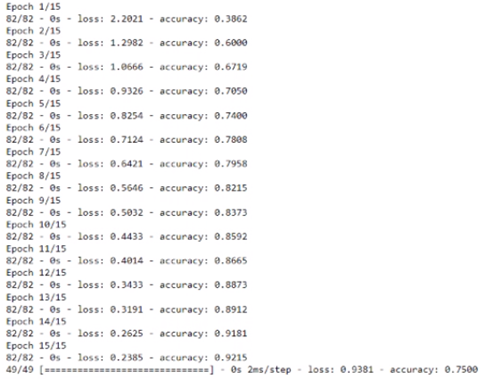

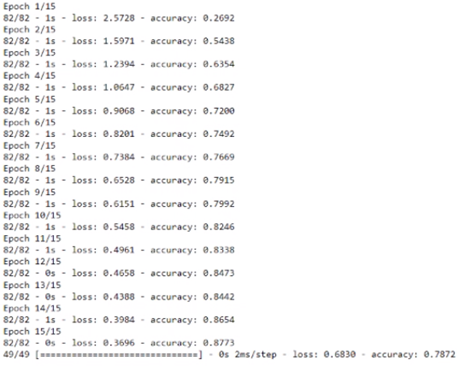

Se observa que modificar a menos que 5 pixeles afecta la precisión, y modificar a 15 más bien lo afecta mucho peor, entonces se decide dejar 3 pixeles en cada kernel.

Luego se modifican los layers de pooling, que reducen la dimensionalidad de las entradas, se tenía como base 2, por lo que se probó con valores de 1 y 3 respectivamente:
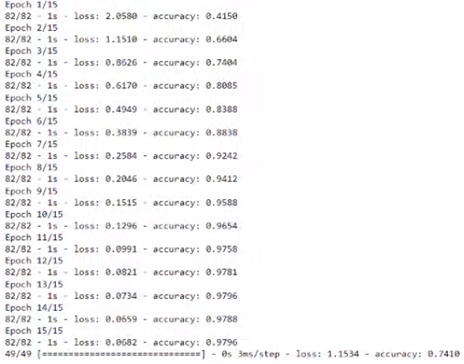

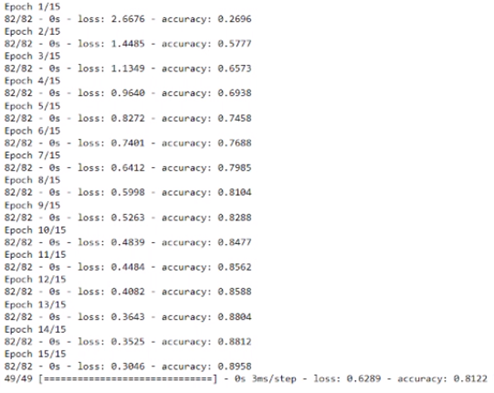

Es importante primero destacar que el cambio del pooling layer afecta increíblemente la eficiencia de la CNN, un cambio mínimo de una unidad representa un cambio enorme en la precisión, como sucede acá, el error que se obtiene con 1 pooling layer es de 6.82%, que comparado al 16.17% obtenido con 2 pooling layers anteriormente, es una mejora del 42.18%, sin embargo, aumentar a 3 el pooling layer más bien empeora el sistema, el error en 3 pools es de 30.46%, empeora el sistema en un 88.37%, por lo que se modifica el valor del pooling layer a 1 como mejor opción.

Por último, se modificó la cantidad de iteraciones para entrenar el CNN, que, a pesar de que ya estaba dando una buena precisión, es indispensable reconocer que disminuir esta cantidad mejora el consumo de recursos de la CNN y si su precisión no varía demasiado del valor base que se tomó antes (de 15 epochs), se tomará como mejor.

Se probaron valores de 5 y de 10 respectivamente.


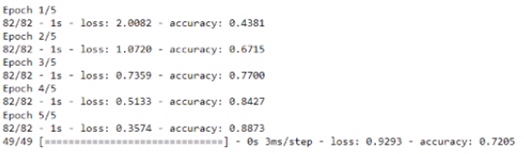

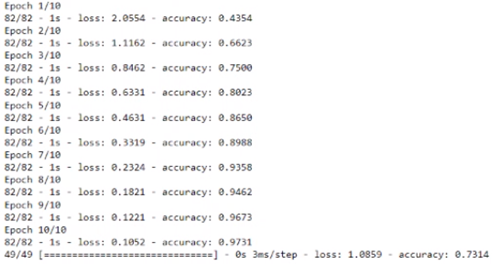

Rápidamente se puede observar que la eficiencia de este CNN simplemente empeoró al modificar la cantidad de iteraciones, pasando de un error de 6.82% con 15 iteraciones, a 10.52% con 10 iteraciones, a 35.74% con 5 iteraciones, por lo que el valor de 15 iteraciones es el ideal, recordar que esto es para un CNN de 8 kernels, se probó lo mismo con la CNN de 24 kernels, que se había escogido como la mejor, y sí mejoró mucho la precisión en 10 epochs.

Ya con estos análisis a la mano, se puede concluir con certeza que la mejor combinación de paramatetros será la siguiente:

24 kernels, 1 pooling layer, 3 pixeles, 10 iteraciones.



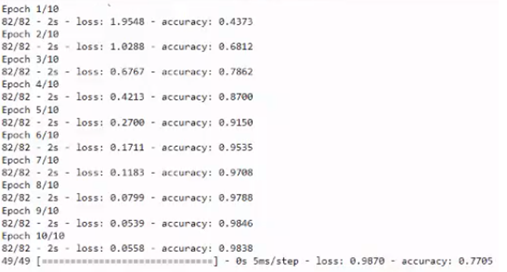

Ahora, comparando estos resultados a los obtenidos por nuestra MLP a 15 epochs, que nos daba 13.64% de error y 97.58% a la mejor CNN con resultados de 5.58% de error y 98.38%, es mucho mejor y más precisa a la hora de predecir y clasificar nuestra CNNE

### 2 – Las redes convolucionales “entrenan” las formas de cada uno de los “kernels”, de manera que cada uno termina realizando algún tipo de convolución sobre la imagen.

A – para un subconjunto de imágenes (una por letra) visualicen la forma del mapa de activación generado por cada kernel.
La respuesta corta de hipótesis con esta 	acción es que pareciera que los kernels realizan diferentes acciones en las imágenes, esto se puede observar porque por cada una de las 26 letras están ploteadas 8 veces, esto es porque como se había mencionado en la pregunta 1, a pesar de que 24 kernels dan una mejor precisión, 8 kernels ayuda a visualizar mejor los resultados, en vez de tener 26*24 = 624 resultados diferentes, se tendrá ahora 26*8 = 208, obsérvese el ejemplo, los 8 análisis son diferentes entre cada uno, aunque algunos kernels no lo parezcan, hay algunos resultados en que se evidencian más los blancos, en otra se evidencian más los negros, en otra se resaltan los bordes, en otra se resultan las estructuras rugosas, y demás.

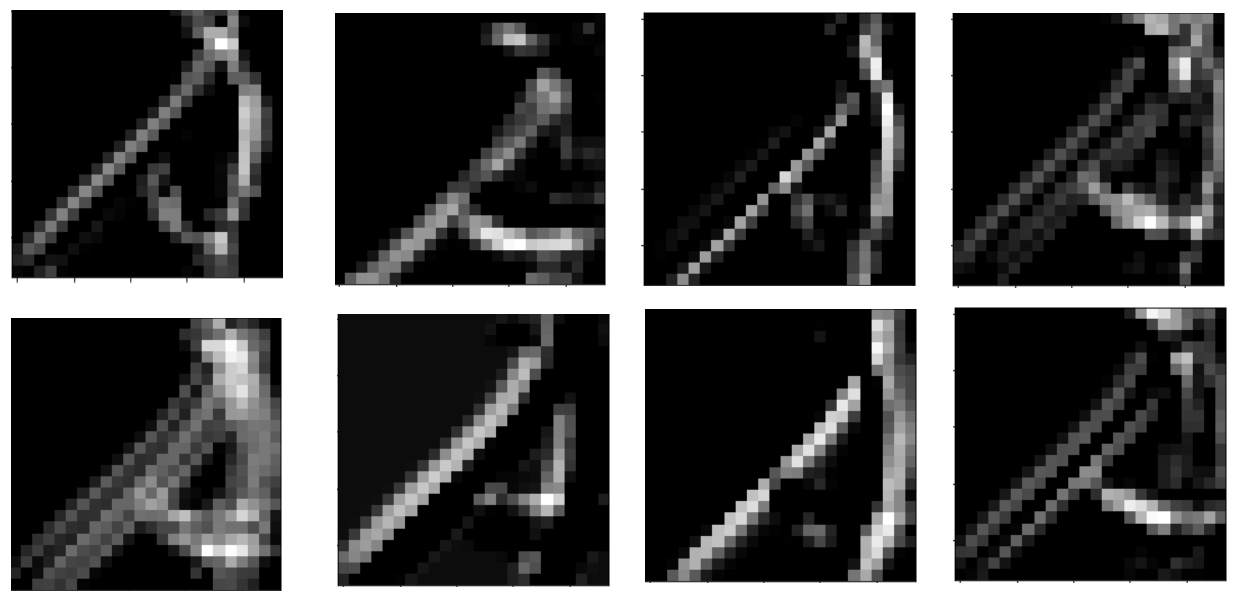

B – en base a la inspección de dichos mapas de activación, propongan hipótesis sobre que función realiza cada kernel ¿aparecen kernels que realizan funciones casi indistinguibles? Si es así, ¿en qué casos y en que redes?

De la pregunta 1, de la imagen, se puede observar que (primer kernel izquierda superior, ultimo a la derecha inferior) que todos son distintos, en primera mano el 5to pareciera resaltar mejor los blancos, y el 1er desatura la imagen, el 7mo mejor los bordes, y el 4to oscurece el interior del trazo.

C – para “verificar” sus hipótesis, realicen la convolución de imágenes de naturaleza diferente (pero del mismo tamaño, se sugiere el uso de, por ejemplo, cifras escritas a mano, claramente diferentes de las letras) y verifiquen sus hipótesis de trabajo.

Cuando se hacen las mismas pruebas con otro set de datos, es decir, los números, se obtiene de manera satisfactoria resultados similares. Por lo que las hipótesis de cada núcleo se ven de forma favorable.

•	¿Qué implica la adopción de un número mayor de kernels en una red? ¿el incrementar una y otra vez dicho número va a mejorar necesariamente el aprendizaje del 
conjunto? ¿Por qué?

Los kernels, como se mencionó anteriormente, son los filtros por los que pasa cada entrada, véase como una matriz con números enteros que pasa por un subconjunto de la matriz de entrara y los valores de la matriz se multiplican por los valores que se encuentran en la matriz del subconjunto de la matriz del mismo tamaño que el kernel, hasta haber completado toda la matriz de entrada, por tanto, un mayor número de kernels significaría que este proceso se realice la cantidad de veces como cantidad de núcleos tenemos, cada proceso que esto suceda, va a ser con un kernel diferente, del mismo tamaño pero con números enteros diferentes, entonces el proceso de filtrado será mucho mejor, y dará más campo abierto al mejoramiento de errores.
Aumentar una sí va a mejorar el aprendizaje del conjunto, por cada vez se filtra de mejor manera la imagen de entrada y su proceso de convolución dará resultados distintos que la red pueda identificar como válidos en su aprendizaje, luego combinándolos para angostar las posibilidades y la precisión de predicción.


•	¿Se puede establecer algún tipo de “principio básico” o definición sobre qué tipo de 
labores efectúan los kernel?
Varias veces se ha explicado ya que básicamente un kernel es una matriz cuadrada con valores enteros dentro de sí, que se multiplican a los valores de la matriz de entrada y el único resultado numérico se coloca en otra matriz (esto se conoce como proceso de convolución)


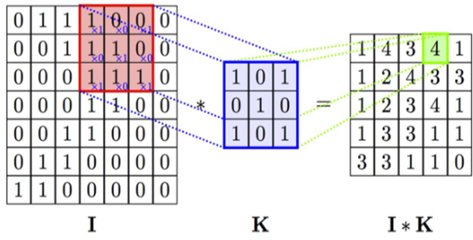

•	Se dice que, al menos en el estado actual de desarrollo de la técnica, el uso de redes convolucionales para clasificación de imágenes biomédicas debe usarse siempre cómo un método de preclasificación (para un posterior análisis por parte de un especialista) y nunca como un método totalmente automatizado de diagnóstico “incluso aunque la tasa de aciertos de la red sobre un conjunto de ejemplos de prueba muy elevado fuera muy superior a la tasa de aciertos de un especialista humano” ¿Por qué motivo se podría hacer esta afirmación? ¿puede ejemplificar dicho motivo, de alguna manera, con base en los experimentos realizados en esta tarea?

En esta tarea el conjunto de datos que se toma son letras y números, y aun así, teniendo altísimos valores de precisión, la CNN fallaba en algunas ocasiones a la hora de predecir el label de alguna imagen, aunque esto sucediera vez perdida, esta situación demostraba que la máquina no era infalible, que podía fallar, además la situación de equivocarse en la clasificación de una letra o un número, no afecta a nadie directamente, simplemente fue un error de máquina y ya está, sin embargo, cuando se trata de salud, la precisión es esencial, y la máquina en alguno de estos errores, en la lectura de una imagen médica puede clasificar de manera incorrecta alguna condición importante y terminar haciéndole un daño enorme al paciente, es por esto que primero se utiliza como una precalificación, si, para esto agiliza mucho el proceso de evaluaciones que se le tiene que hacer a un paciente, y después de eso confirmar o rechazar clasificaciones con el especialista humano indicado (igual también para esto existe toda una carrera de 7 años llamada imagenología) y que por último, este sea quién de el diagnostico final.
En resumen, ninguna máquina se puede utilizar para dar la última palabra en la clasificación de condiciones médicas de un humano pues las máquinas no son infalibles, sin embargo, pueden funcionar como primer acercamiento para descartar en primera mano algunas condiciones no tan importantes y agilizar el proceso de encontrar rápido el diagnostico del paciente, y comenzar lo antes posible su tratamiento.


#### Bilbiografía

P. Singh y A.  Manure. Learn TensorFlow 2.0 Implement Machine Learning and Deep Learning Models with Python. y Springer Science+Business Media, New York2020.
